# What is Time-Series Forecasting? #

Time-series forecasting is a statistical technique used in data analysis to predict future values based on historical data points collected over time. 

Data is ordered chronologically and each observation is associated with a specific timestamp. The primary objective of time-series forecasting is to identify patterns, trends, or seasonality within the historical data, e.g. between time stamps. 

This enables the creation of models that can make predictions about future values. It is widely applied in finance, economics, weather forecasting, and stock market analysis, where having some ability to predict trends over time are necessary for informed decision-making.

To perform time-series forecasting, various mathematical and statistical models are employed, such as autoregressive integrated moving average (ARIMA), exponential smoothing methods, and machine learning algorithms.

The accuracy of time-series forecasting models depends on the quality of the historical data, the appropriateness of the chosen model, and the ability to adapt to changing conditions in the time series especially when working with something as volatile as cryptocurrency where one day it might be up 5% for much of the day and then it suddenly drops by 30% because of a huge transaction or a real-world event (Yes I have witnessed this many times)!

When writing a time-series forecast, the most commonly used libraries for this are Pandas, Statsmodels, and Scikit-Learn. 
Some data scientists also use Keras and TensorFlow depending on what kind of model you're looking to build. 
TensorFlow is an open-source machine learning library used with neural networks, and Keras is an API that runs on top of TensorFlow.
All of the above can be used to implement deep learning models for time-series forecasting.

When working on time-series forecasting projects, it's common to use a combination of these libraries based on the specific requirements of the task. The choice of library often depends on the complexity of the forecasting problem and the desired level of control over the modeling process.

# Models used in finance/economics to predict financial time series forecasts #

1. ARIMA (AutoRegressive Integrated Moving Average):
ARIMA models are popular for time-series forecasting and are effective when dealing with stationary time series data. These models incorporate autoregressive (AR) and moving average (MA) components and can be tuned with parameters like the order of differencing, autoregressive order, and moving average order.

2. GARCH (Generalized Autoregressive Conditional Heteroskedasticity):
GARCH models are specifically designed for modeling volatility in financial time series. As cryptocurrency prices exhibit significant volatility, GARCH models can be useful for our project if we want to model the volatility of bitcoin price (i.e. how prone to large changes it is). The GARCH process provides a more real-world context than other models when predicting the prices and rates of financial instruments.

https://www.investopedia.com/terms/g/generalalizedautogregressiveconditionalheteroskedasticity.asp

3. LSTM (Long Short-Term Memory) Networks:
LSTM networks are a type of recurrent neural network (RNN) which is well-suited for capturing long-term dependencies in sequential data. They have been applied successfully to time-series forecasting tasks, including cryptocurrency price prediction. TensorFlow or PyTorch can be used to implement LSTM models.

4. Machine Learning Algorithms (Random Forests, Gradient Boosting, etc.):
Ensemble methods like Random Forests and Gradient Boosting, implemented using libraries such as scikit-learn, can be powerful for predicting financial time series. 
As we know, these algorithms can capture complex relationships in the data and handle both linear and non-linear patterns.

Note: we haven't covered neural networks so Vaish is probably expecting an ML regression model. I decided on #4 for the purpose of this workbook but if we end up using a different one, that's fine but may limit the utility of this book. 

 # The process of time-series forecasting involves several key steps. Here is a general recipe:

--- EDA ---
1. Data Collection: gather historical time-series data relevant to the forecasting task. Ensure the data includes timestamps and the corresponding values.

2. Data Exploration: use tools like pandas to explore and visualize the time-series data. Look for trends, patterns, and any seasonality that may be present.

3. Data Preprocessing: address missing values, handle outliers, and perform any necessary data cleaning. Convert the data into a suitable format for analysis.

4. Feature Engineering: extract relevant features from the time-series data that may aid in forecasting. This could include lagged values, moving averages, or other domain-specific features.

--- Model Building ---

5. Train-Test Split: split the dataset into training and testing sets. The training set is used to train the forecasting model, while the testing set is used to evaluate its performance.

6. Model Selection: choose a suitable time-series forecasting model based on the characteristics of the data. Common models include ARIMA, SARIMA, exponential smoothing methods, or machine learning models such as decision trees, random forests, or more complex deep learning models like neural networks.

7. Model Training: train the selected model using the training set. Adjust model parameters as needed, and fine-tune the model to achieve the best performance.

8. Model Validation: validate the model using the testing set to assess its accuracy and generalization to unseen data. Metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), or Root Mean Squared Error (RMSE) are often used for evaluation.

9. Hyperparameter Tuning: if using machine learning models, perform hyperparameter tuning to optimize the model's performance, e.g. use GridSearchCV and optimise for your desired metric like MSE or R^2.

--- Post-Build ---

10. Model Deployment: deploy the trained model for making real-time forecasts if the task requires it. 

11. Monitoring and Updating: continuously monitor the model's performance over time. Consider updating the model or retraining it periodically to maintain accuracy.

12. Documentation: document the entire process, including data sources, preprocessing steps, model selection, training configurations, and evaluation results.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [2]:
# I found a Bitcoin monitoring site that allows you to download an entire configurable time series of data as a CSV, so I'll use that to serve as an example dataset for this demonstration. #
# Date range = 1st December 2023 -> 19th January 2024, so that I can check the forecasted predictions this week's real life prices to judge accuracy.

df_btc = pd.read_csv('Bitcoin Price Data.csv')

print(f'Dataframe Shape: ', df_btc.shape)
print(f'Dataframe Columns: ', df_btc.columns)
print(f'Dataframe Data Types: ', df_btc.dtypes)
print(f'Dataframe Nulls: ', df_btc.isnull().sum())


Dataframe Shape:  (32, 7)
Dataframe Columns:  Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')
Dataframe Data Types:  Date        object
Price       object
Open        object
High        object
Low         object
Vol.        object
Change %    object
dtype: object
Dataframe Nulls:  Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64


In [3]:
df_btc.head(5)

,Date,Price,Open,High,Low,Vol.,Change %
0,19/01/2024,"41,280.5","41,293.8","41,543.6","40,752.8",75.85K,-0.03%
1,18/01/2024,"41,292.7","42,763.5","42,908.0","40,682.6",70.35K,-3.45%
2,17/01/2024,"42,768.7","43,139.1","43,192.3","42,211.8",50.44K,-0.87%
3,16/01/2024,"43,145.5","42,515.2","43,563.7","42,093.1",63.93K,1.49%
4,15/01/2024,"42,510.7","41,747.6","43,348.9","41,719.2",52.08K,1.83%


# Data Dictionary #

Date = The date each row of data was recorded.
Price = The value of one Bitcoin at the time the data was recorded. (end of day)
Open = The starting price of one Bitcoin at the beginning of the day.
Low = The lowest price of Bitcoin recorded on that day.
High = The highest price of Bitcoin recorded on that day.
Vol. = The total number of Bitcoins traded on the crypto markets that day. 
Change % = the percentage change in Bitcoin value during that day. 

In [4]:
df_btc['Date'] = pd.to_datetime(df_btc['Date'], format='%d/%m/%Y') # Converting the dates from 'Object' to 'Datetime64' in our format (day/month/year) because the Python default is Month/Day/Year.

df_btc.dtypes
# <m8[ns] is the NumPy representation for the datetime64[ns] data type, which is used to represent dates and times with nanosecond precision in pandas. df_btc.info will show it as datetime64.
# This step must be done for date objects in dataframes if you want to use the date, e.g. for time-series forecasting. 

Date        datetime64[ns]
Price               object
Open                object
High                object
Low                 object
Vol.                object
Change %            object
dtype: object

In [5]:
numeric_columns = ['Price', 'Open', 'High', 'Low'] # These are currently objects so need to convert these but currently looking at uniques to have a look at characters I'd need to take out to run a 
for column in numeric_columns:
    unique_values = df_btc[column].unique()
    print(f"Unique values in {column}: {unique_values}")
    
# I will do Vol. and Change % separately because converting with the first 4 causes NaN errors. 

Unique values in Price: ['41,280.5' '41,292.7' '42,768.7' '43,145.5' '42,510.7' '41,746.1'
 '42,851.3' '42,835.9' '46,348.2' '46,629.3' '46,129.0' '46,962.2'
 '43,927.3' '43,967.9' '44,156.9' '44,157.0' '42,836.1' '44,943.7'
 '44,183.4' '42,272.5' '42,136.7' '42,072.4' '42,581.1' '43,446.5'
 '42,513.3' '43,578.5' '42,981.5' '43,710.4' '43,968.9' '43,865.9'
 '43,662.8' '42,259.3']
Unique values in Open: ['41,293.8' '42,763.5' '43,139.1' '42,515.2' '41,747.6' '42,851.3'
 '42,836.7' '46,348.1' '46,629.3' '46,112.0' '46,959.2' '43,934.2'
 '43,973.5' '44,156.6' '44,163.0' '42,836.1' '44,943.7' '44,182.9'
 '42,272.5' '42,141.6' '42,074.7' '42,581.1' '43,446.5' '42,514.3'
 '43,579.9' '42,982.0' '43,710.4' '43,968.9' '43,865.9' '43,660.3'
 '42,259.5' '42,659.7']
Unique values in High: ['41,543.6' '42,908.0' '43,192.3' '43,563.7' '43,348.9' '43,069.4'
 '43,248.6' '46,503.2' '48,923.7' '47,654.3' '47,880.1' '47,196.7'
 '44,481.2' '44,203.2' '44,312.1' '44,744.5' '45,492.7' '45,885.4'
 '44,187.0'

In [6]:
df_btc[numeric_columns] = df_btc[numeric_columns].replace({',': '', 'k': '', '%': ''}, regex=True).apply(pd.to_numeric, errors='coerce') 
# It converted to floats without lots of nulls, hallelujah. 
# # 'Regex' takes string symbols like commas out and leaves them as empty, e.g. 1,2,3 would become 1 2 3. You have to remove these symbols to convert to numeric.
# errors='coerce' means that any values that can't be converted will be recorded in the output DF as 'NaN'

df_btc['Change %'] = df_btc['Change %'].str.rstrip('%')  # Remove the percentage sign from the Change % column.
df_btc['Change %'] = df_btc['Change %'].astype(float) / 100  # Convert to float and divide by 100 to get the decimal value

df_btc['Vol.'] = df_btc['Vol.'].str.replace(r'[K.,]', '', regex=True) # Doing the same to Volume. str.replace is taking the letters out of the string so they will convert to Int.
df_btc['Vol.'] = df_btc['Vol.'].astype(int) * 1000 # Multiply by 1,000 since we've removed the 'k' letter that represents thousands. 
print(f'New Datatypes: ', df_btc.dtypes)


New Datatypes:  Date        datetime64[ns]
Price              float64
Open               float64
High               float64
Low                float64
Vol.                 int32
Change %           float64
dtype: object


In [7]:
df_btc.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [8]:
df_btc.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,32,32.000000,32.000000,32.00000,32.000000,3.200000e+01,32.000000
mean,2024-01-03 12:00:00,43491.318750,43534.471875,44377.60000,42577.909375,6.355500e+06,-0.000675
min,2023-12-19 00:00:00,41280.500000,41293.800000,41543.60000,40682.600000,2.129000e+06,-0.075800
25%,2023-12-26 18:00:00,42512.650000,42564.625000,43323.82500,41831.175000,3.693000e+06,-0.013100
50%,2024-01-03 12:00:00,43296.000000,43292.800000,43965.15000,42263.250000,5.368500e+06,-0.000150
75%,2024-01-11 06:00:00,44015.900000,44019.275000,44547.02500,43314.075000,7.172500e+06,0.014150
max,2024-01-19 00:00:00,46962.200000,46959.200000,48923.70000,45651.800000,1.369200e+07,0.069100
std,NaN,1457.972284,1408.691877,1667.59605,1185.897020,3.262113e+06,0.026834


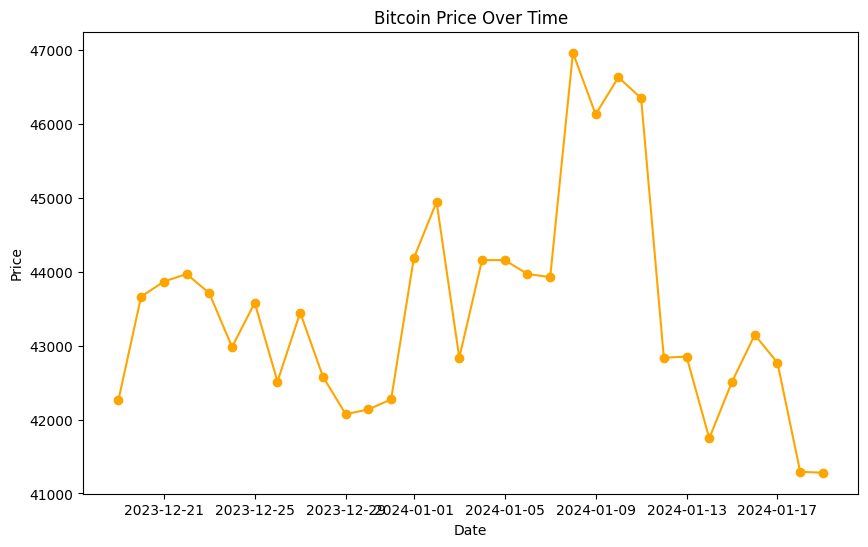

In [9]:
# Normally at this point I'd do more EDA but since the purpose of this workbook is to understand a Time-Series Forecast, I'll skip over much of this. 
# But do remember the EDA steps when doing this on your actual dataframes when the project progresses. 

# I've converted all the data from object to datetime, float, and integer types so that they can go into a ML model. 
# I've ensured there are no nulls. 
# I'll quickly have a look at how 'Price' behaves over time to see if it's linear or non-linear.

# Plotting 'Price' against 'Date':
plt.figure(figsize=(10, 6))
plt.plot(df_btc['Date'], df_btc['Price'], marker='o', linestyle='-', color='orange') # because Bitcoin is orange, why not!
plt.title('Bitcoin Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [10]:
# Here I'm running Grid Search on a couple regressions to see how well a model based on our input can actually predict Price or not, before we start using it for predictions. 
# I don't think this is something you absolutely need to do, I'm just doing it to check and get a head start on parameter tuning.
# GridSearch is optimised for MSE. I did Gradient Boosting and Random Forest. I also did SVR but doing GridSearch on this took 30+ minutes and the output was not favorable so I've removed SVR.

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV

X = df_btc.drop(['Price', 'Date'], axis=1) # Since we're not doing forecasting yet, I'm dropping 'Date' as well because having a datetime64 dtype in the model will stop GridSearch from running properly.
y = df_btc['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Define parameter grids for each model, hop on Google and look up all the different possibilities if you wish. I just used the recommended ones. 
param_grid_random_forest = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]}

param_grid_gradient_boosting = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10]}

# Random Forest Regression
grid_search_random_forest = GridSearchCV(RandomForestRegressor(random_state=123),
param_grid_random_forest, scoring='neg_mean_squared_error', cv=5)

grid_search_random_forest.fit(X_train, y_train)

best_random_forest = grid_search_random_forest.best_estimator_
y_pred_test_random_forest = best_random_forest.predict(X_test)
mse_random_forest = mean_squared_error(y_test, y_pred_test_random_forest)
r2_random_forest = r2_score(y_test, y_pred_test_random_forest)
print("Random Forest:")
print(f"Best Parameters: {grid_search_random_forest.best_params_}")
print(f"Mean Squared Error: {mse_random_forest}")
print(f"R-squared: {r2_random_forest}")

# Gradient Boosting Regression
grid_search_gradient_boosting = GridSearchCV(GradientBoostingRegressor(random_state=123),
param_grid_gradient_boosting, scoring='neg_mean_squared_error', cv=5)

grid_search_gradient_boosting.fit(X_train, y_train)

best_gradient_boosting = grid_search_gradient_boosting.best_estimator_
y_pred_test_gradient_boosting = best_gradient_boosting.predict(X_test)
mse_gradient_boosting = mean_squared_error(y_test, y_pred_test_gradient_boosting)
r2_gradient_boosting = r2_score(y_test, y_pred_test_gradient_boosting)
print("\nGradient Boosting:")
print(f"Best Parameters: {grid_search_gradient_boosting.best_params_}")
print(f"Mean Squared Error: {mse_gradient_boosting}")
print(f"R-squared: {r2_gradient_boosting}")

Random Forest:
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Mean Squared Error: 853703.3702616056
R-squared: 0.6898538793262337

Gradient Boosting:
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Mean Squared Error: 1000479.3986916173
R-squared: 0.6365308898532966


# Which one to use?

1. Random Forest (RF):
Parallelization: RF can be parallelized (divided into smaller subtasks for faster calculation), making it suitable for large datasets and computationally efficient.
Robust to overfitting: RF is less prone to overfitting compared to Gradient Boosting.
Feature importance: RF provides a feature importance score, which can be useful for understanding the contribution of different features to the predictions.

2. Gradient Boosting (GB):
High predictive accuracy: GB often performs well in terms of predictive accuracy and can capture complex patterns in the data.
Sequential learning: GB builds trees sequentially, learning from the mistakes of the previous trees. This can make it effective for capturing trends in time series data.
Tunable parameters: GB has more hyperparameters to tune, offering flexibility for optimization and fine-tuning.

3. Considerations for Time Series Forecasting:

Sequential nature: Time series data has a sequential structure, and capturing temporal dependencies is crucial. Gradient Boosting, with its sequential learning approach, can sometimes be more effective in capturing time dependencies.

Data size: If you have a large dataset, Random Forest might be computationally more efficient due to its parallelization capabilities.

Complexity of patterns: If the time series exhibits complex patterns that may require a more adaptive and sequential learning approach, Gradient Boosting might be a better choice.

In [11]:
# I decided Random Forest because it performed better in MSE/R^2 and so that I can also have a look at Feature Importance scores. # 

# Splitting the data into training and testing sets, it seems to be done differently for forecasting than with standard regressions based on the tutorials I've glanced at.

train_data = df_btc[df_btc['Date'] < '2024-01-13'] # This permits use of the data up to the 13th of January for training. Anything after this is left out of the training data and we use as test data.
test_data = df_btc[(df_btc['Date'] >= '2024-01-13') & (df_btc['Date'] <= '2024-01-19')] # This is the 13th to 19th range that we're using to test the accuracy of the model's prediction.

# 'Date' is dropped because it's a temporal variable and keeping it as a feature could lead to data leakage.
# 'Price' is dropped because it's the target variable you're trying to predict.
# Data leakage leads to overly optimistic performance metrics during training but poor generalization to new, unseen data.
X_train, y_train = train_data.drop(['Price', 'Date'], axis=1), train_data['Price']
X_test = df_btc[df_btc['Date'] >= '2024-01-13'].drop(['Price', 'Date'], axis=1)

# Random Forest Regression
model_random_forest = RandomForestRegressor(max_depth = None, min_samples_split = 2, n_estimators = 50) # Note I've used the parameters from the grid search output
model_random_forest.fit(X_train, y_train)

# Make the predictions.
y_pred_future = model_random_forest.predict(X_test)
y_true_future = test_data['Price'] # the actual future data from the 13th to the 19th.

# Print Feature Importance
feature_importance = model_random_forest.feature_importances_
feature_names = X_train.columns
feature_importance_dict = dict(zip(feature_names, feature_importance)) # this line uses zip to create a dictionary where each feature name is placed alongside its importance score. 
print("\nFeature Importance: ", feature_importance_dict)

# Performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error 
mae_future = mean_absolute_error(y_true_future, y_pred_future) # true future data vs predicted future data
mse_future = mean_squared_error(y_true_future, y_pred_future)

# Print the performance metric results
print(f"Mean Absolute Error (MAE) for future dates: {mae_future}")
print(f"Mean Squared Error (MSE) for future dates: {mse_future}")



Feature Importance:  {'Open': 0.029035096015328166, 'High': 0.5857158631401769, 'Low': 0.29550650529184863, 'Vol.': 0.04215278884649171, 'Change %': 0.04758974670615457}
Mean Absolute Error (MAE) for future dates: 488.08514285714256
Mean Squared Error (MSE) for future dates: 403333.19068799296


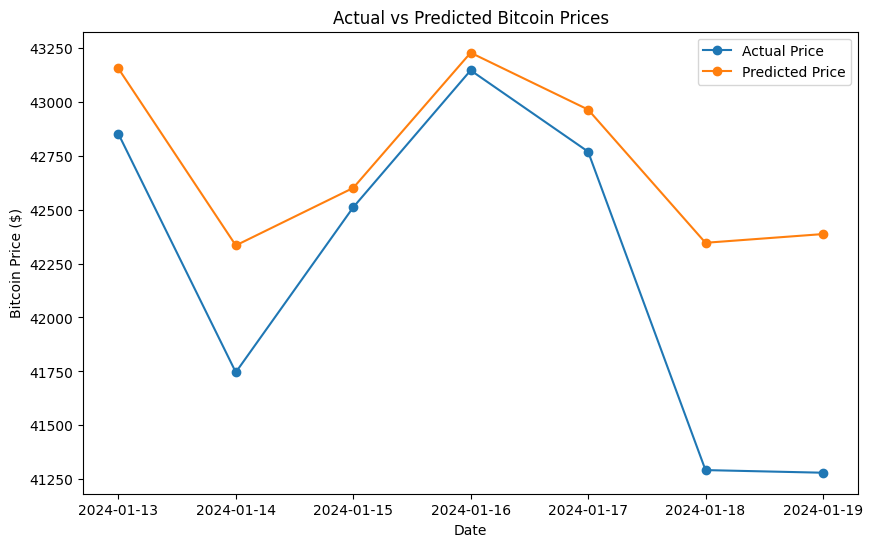

In [12]:
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(test_data['Date'], y_true_future, label='Actual Price', marker='o') # What the real data shows.
plt.plot(test_data['Date'], y_pred_future, label='Predicted Price', marker='o') # What our model's predictions were for the 13th - 19th Jan.
plt.xlabel('Date')
plt.ylabel('Bitcoin Price ($)')
plt.title('Actual vs Predicted Bitcoin Prices')
plt.legend()
plt.show()

# Output Interpretation #

1. Mean Absolute Error (MAE): 470.606
MAE represents the average absolute difference between the actual and predicted values.
In this case, the model's predictions deviate by about 470.61 units from the actual Bitcoin price (in this example, $470.61)

2. Mean Squared Error (MSE):
MSE measures the average squared difference between the actual and predicted values.
On average, the squared differences between the actual and predicted values are around 390,804.82

3. R^2: measures the amount of variance in 'Price' that can be explained by the features of the model.
R^2 = 0.6898 = the model explains 68.98% of variance in Bitcoin price by tracking Open, High, Low, Volume, and Change %. So maybe we need to find some more features that might help.

4. Feature Importance: represents the contribution of each feature to the predictions made by the model. It totals up to 100%.
Open: 2.70%
High: 53.94%
Low: 30.96%
Volume: 4.87%
Change %: 7.54%

These % tell us that the 'High' feature and 'Low' feature had the most influential impact on the model's predictions, while the rest were much less influential. 
I'm surprised to see that 'Volume' is only 4.87% as I would have expected that to be higher, but maybe this is because there weren't any massive high-volume BTC transactions during the time period I used for this example.  

Overall, it's not a terrible model up to the 17th but it failed to account for a sudden drop in price between the 17th and 18th, which is what I personally would expect for any model that tried to predict something as volatile as cryptocurrency. They are, after all, infamous for going up-and-down like yoyos unless you're looking at a stablecoin which is crypto that is tethered to a real world ('fiat') currency like USD or GBP to control its price fluctuation. 

Different crypto exchanges also assign differing prices to Bitcoin because they all have their own code/programme for tracking its price in realtime, so importing data from different crypto exchanges might also make a noticeable difference too. 

However, it's worth remembering that a model is only as good as the data you put into it. A model with a larger time series of data (e.g. going back 1 year instead of 1 month) would likely perform differently. Another regression model might also have a different output! This was just a test-run to see if I could get a time-series forecast working so that you have an example to study to make the process of building a model a bit easier. 

It's worth also noting this model has the data we are trying to predict, which allows us to assess its accuracy. But if we wish to extend its predictions beyond the data available to it, how shall we do this? 

In [13]:
# Redoing this TS-F with ARIMA worthwhile? #
from statsmodels.tsa.arima.model import ARIMA

